# Data processing

# Libraries

In [7]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

from constants import NUM_SELECTED, SELECTED_FEATURES
from settings import NUM_BASIC_STEPS

# Data Loading

In [2]:
X_train = pd.read_parquet("../../../../../data/interim/copper/X_train.parquet")

bootstrap = lambda X, i: X.sample(X.shape[0], replace=True, random_state=i)
X_list = [bootstrap(X_train[SELECTED_FEATURES], i) for i in range(1, 101, 10)]

# PCA Analysis

In [8]:
weights_list = []

for X in X_list:
    numeric_transformer = Pipeline(steps= NUM_BASIC_STEPS +[( 'pca', PCA(n_components=len(NUM_SELECTED)))])

    numeric_transformer.fit(X_train[NUM_SELECTED])

    pca = numeric_transformer.named_steps['pca']

    # Get the explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_

    weights = pd.Series(explained_variance_ratio*100)

    weights_list.append(weights)

weights_df = pd.concat(weights_list, axis=1)

In [9]:
plot_df = (
    weights_df
    .reset_index()
    .rename(columns={"index": "PCA Component"})
    .melt(id_vars="PCA Component", var_name="Fold", value_name="Explained Variance (%)")
)

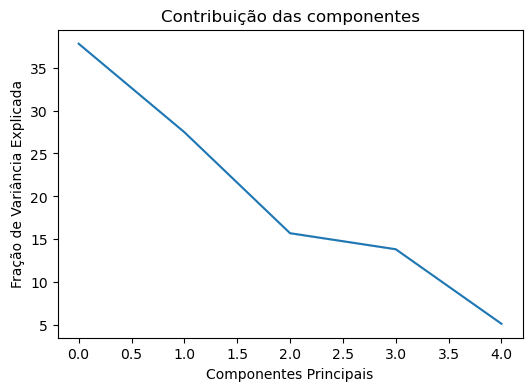

In [10]:
# Plot the explained variance ratio
fig, ax = plt.subplots(figsize=(6, 4))

sns.lineplot(plot_df, x="PCA Component", y="Explained Variance (%)", ax=ax, estimator='median')
ax.set_xlabel('Componentes Principais')
ax.set_ylabel('Fração de Variância Explicada')
ax.set_title('Contribuição das componentes')

plt.show()

In [11]:
plot_df.groupby("PCA Component")["Explained Variance (%)"].mean().cumsum()

PCA Component
0     37.782755
1     65.265169
2     80.981147
3     94.830098
4    100.000000
Name: Explained Variance (%), dtype: float64

In [ ]:
#NUM_COMP = 4

#pca = PCA(n_components=NUM_COMP)
#PCA_COLS = [f'PCA{i+1}' for i in range(NUM_COMP)]

#X_pca_list = []

#for X in X_list:
#    X_pca = pca.fit_transform(X[NUM_SELECTED])
#    X_pca = pd.DataFrame(X_pca, columns=PCA_COLS, index=X.index)
#    X_pca_list.append(X_pca)

#X_test_pca = pca.transform(X_test[NUM_SELECTED])
#X_test_pca = pd.DataFrame(X_test_pca, columns=PCA_COLS, index=X_test.index)

In [ ]:
#X_train_small_list = []

#for X_pca, X in zip(X_pca_list, X_list):
#    X_train_small = pd.concat([X_pca, X[CAT_SELECTED]], axis=1)
#    X_train_small_list.append(X_train_small)

#X_test_small = pd.concat([X_test_pca, X_test[CAT_SELECTED]], axis=1)

In [ ]:
#for i, X_train_small in enumerate(X_train_small_list):
#    X_train_small.to_parquet(f"../../../../data/interim/copper/X_train_small/X_train_small_{i}.parquet")
    
#X_test_small.to_parquet('../../../../data/interim/copper/X_test_small.parquet')